# Seaborn可视化：图形个性化设置的几个小技巧

## 概述
在可视化过程中，经常会对默认的制图效果不满意，希望能个性化进行各种设置。

本文通过一个简单的示例，来介绍seaborn可视化过程中的个性化设置。包括常用的设置，如：

- 设置图表显示颜色
- 设置图表标题，包括显示位置，字体大小，颜色等
- 设置x轴和y轴标题，包括颜色，字体大小
- 设置x轴和y轴刻度内容，包括颜色、字体大小、字体方向等
- 将x轴和y轴内容逆序显示
- 设置x轴或y轴显示位置

## 未个性化设置的情形
本文的数据来自UCI的数据集”sonar”，用pandas直接读取数据。如下：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

target_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
df = pd.read_csv(target_url, header=None, prefix='V')
corr = df.corr()

首先来看看没有进行个性化设置时的显示情况，如下：

Text(0.5,1,'Correlation between features')

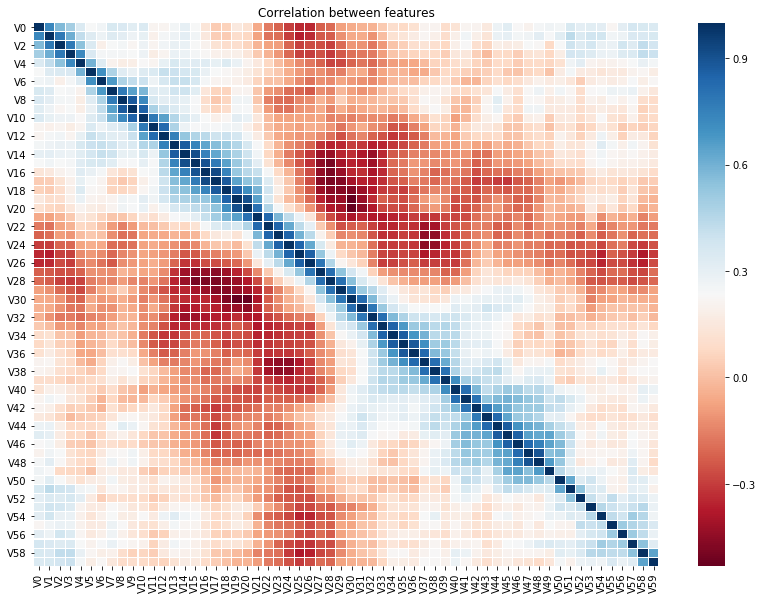

In [2]:
fig,ax = plt.subplots(figsize = (14,10))

sns.heatmap(corr,cmap ='RdBu',linewidths = 0.05, ax = ax)

#设置ax的标题
ax.set_title('Correlation between features')

## 进行个性化设置
对于上面这张图，可能让y轴从下到上，从v0开始显示，这样显示出来的对角线可能更符合我们的视觉显示效果。

这就要用到**将y轴内容进行可逆显示**，涉及的代码如下：
```python
ax.invert_yaxis()
```

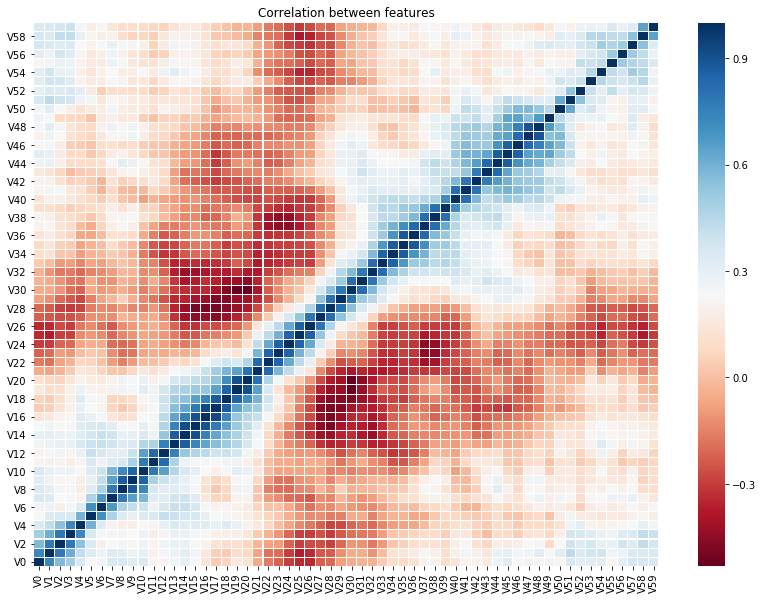

In [4]:
fig,ax = plt.subplots(figsize = (14,10))

sns.heatmap(corr,cmap ='RdBu',linewidths = 0.05, ax = ax)

#设置ax的标题
ax.set_title('Correlation between features')
ax.invert_yaxis()

将x轴刻度放置在top位置的几种方法:
```python
ax.xaxis.set_ticks_position('top')
ax.xaxis.tick_top()
ax.tick_params(axis='x',labelsize=6, colors='b', labeltop=True,labelbottom=False) # x轴
```

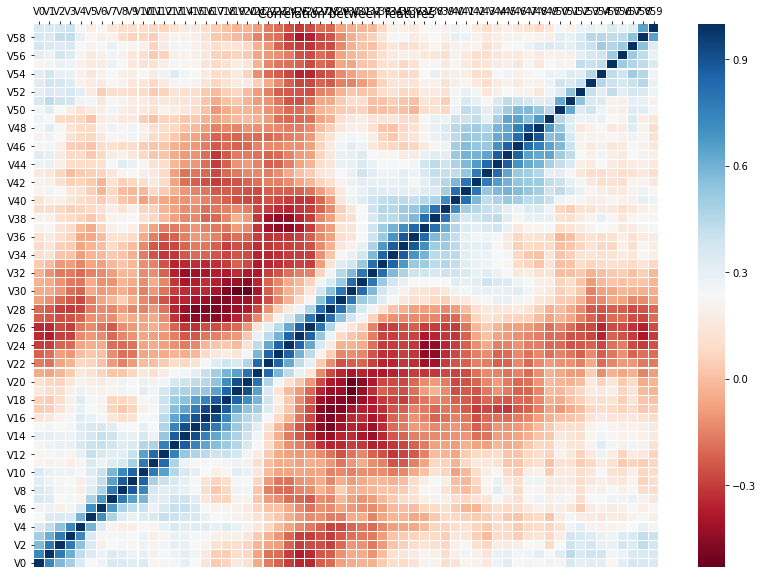

In [5]:
fig,ax = plt.subplots(figsize = (14,10))

sns.heatmap(corr,cmap ='RdBu',linewidths = 0.05, ax = ax)

#设置ax的标题
ax.set_title('Correlation between features')
ax.invert_yaxis()
ax.xaxis.tick_top()

**设置坐标轴刻度参数**，”axis”不写的时候，默认是x轴和y轴的参数同时调整。
```python
ax.tick_params(axis='y',labelsize=8) # y轴
```

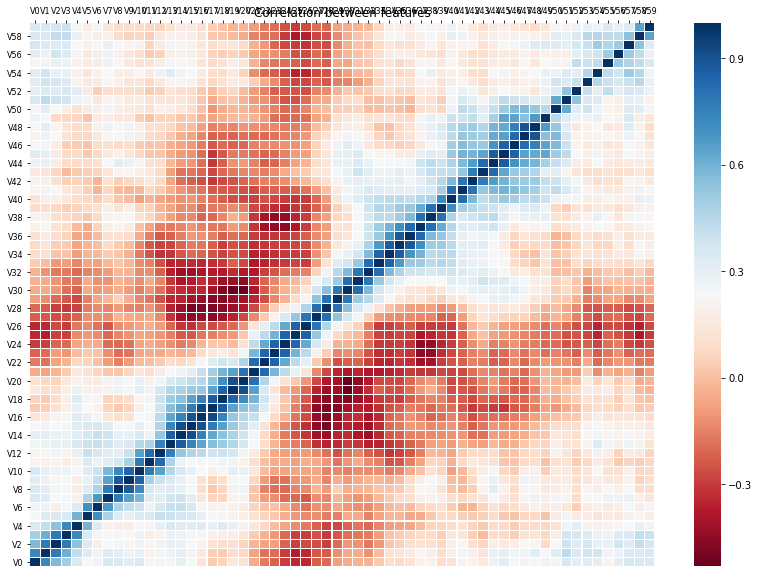

In [7]:
fig,ax = plt.subplots(figsize = (14,10))

sns.heatmap(corr,cmap ='RdBu',linewidths = 0.05, ax = ax)

#设置ax的标题
ax.set_title('Correlation between features')
ax.invert_yaxis()
ax.xaxis.tick_top()
# 设置坐标轴刻度的字体大小
ax.tick_params(labelsize=8)

**旋转轴刻度上文字方向的两种方法**
```python
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
ax.set_xticklabels(corr.index, rotation=90)
```

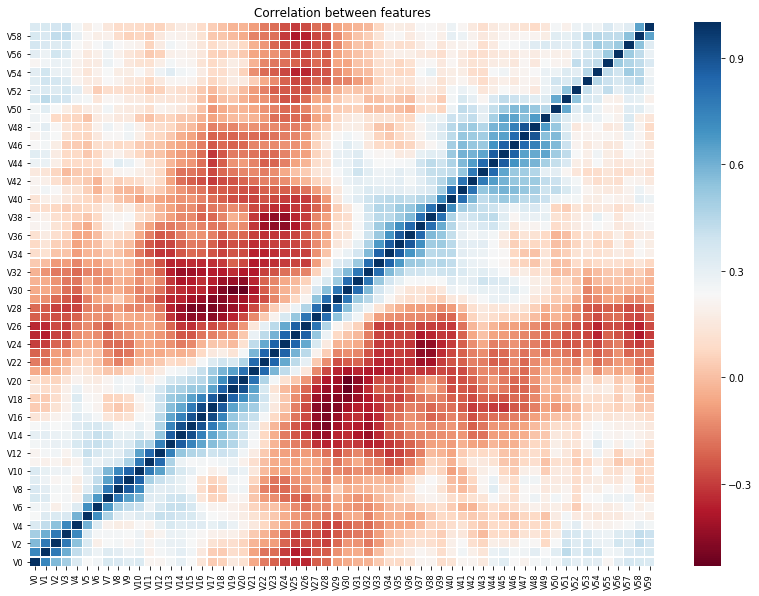

In [11]:
fig,ax = plt.subplots(figsize = (14,10))

sns.heatmap(corr,cmap ='RdBu',linewidths = 0.05, ax = ax)

# 设置ax的标题
ax.set_title('Correlation between features')
ax.invert_yaxis()
# 设置坐标轴刻度的字体大小
ax.tick_params(labelsize=8)
# 旋转轴刻度上文字方向
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**保存图片**，设置`bbox_inches=’tight’`，保存的图片则不会出现部分内容显示不全的现象。
```python
fig.savefig('sns_style_update.jpg', dpi=100, bbox_inches='tight')
```

## 全部代码
整合好的代码如下，大家可以运行试试效果

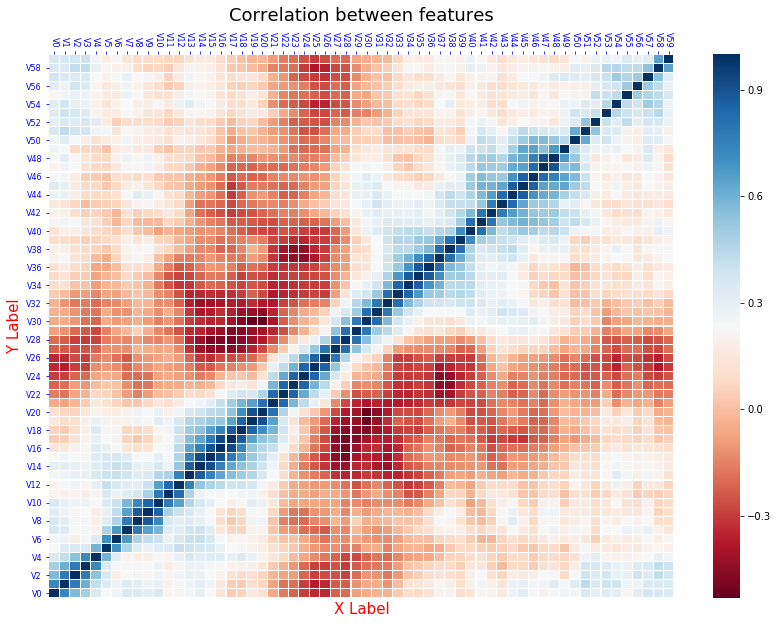

In [17]:
f, ax = plt.subplots(figsize = (14, 10))

# 设置颜色
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)

# color: https://matplotlib.org/users/colormaps.html
sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)

# 设置Axes的标题
ax.set_title('Correlation between features', fontsize=18, position=(0.5,1.05))

# 将y轴或x轴进行逆序
ax.invert_yaxis()

ax.set_xlabel('X Label',fontsize=15, color = 'r')

# 设置Y轴标签的字体大小和字体颜色
ax.set_ylabel('Y Label',fontsize=15, color='r')

# 设置坐标轴刻度的字体大小
ax.tick_params(labelsize=8) # y轴

# 将x轴刻度放置在top位置的几种方法
ax.xaxis.tick_top()

# 修改tick的字体颜色
ax.tick_params(colors='b')

# 旋转轴刻度上文字方向的两种方法
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

# 单独设置y轴或x轴刻度的字体大小, 调整字体方向
# ax.set_yticklabels(ax.get_yticklabels(),fontsize=6)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

f.savefig('sns_style_update.jpg', dpi=100, bbox_inches='tight')

这些个性化的设置，其实大部分都是使用的matplotlib的内容，seaborn是基于matplotlib衍生的，所以可以跟matplotlib进行融合使用。

作者：Lemon   
出处：个人微信公众号：“Python数据之道”（ID：PyDataRoad）和博客园：http://www.cnblogs.com/lemonbit/ 